<a href="https://colab.research.google.com/github/HritikS/DogClassifier/blob/master/DogClassifierTrainColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.0MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.1MB 40.1MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '7a90cd0c85c341f89a3abbe87a7121da')

In [ ]:
categ = 'Golden Retriever', 'Bull Dog', 'German Shepherd'
path = Path('Dogs')

In [ ]:
if not path.exists():
  path.mkdir()
  for cat in categ:
    dest = (path/cat)
    dest.mkdir(exist_ok=True)
    res = search_images_bing(key, cat)
    download_images(dest, urls=res.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#434) [Path('Dogs/German Shepherd/00000109.jpg'),Path('Dogs/German Shepherd/00000071.jpg'),Path('Dogs/German Shepherd/00000111.png'),Path('Dogs/German Shepherd/00000110.jpg'),Path('Dogs/German Shepherd/00000114.jpg'),Path('Dogs/German Shepherd/00000001.jpg'),Path('Dogs/German Shepherd/00000068.jpeg'),Path('Dogs/German Shepherd/00000014.jpg'),Path('Dogs/German Shepherd/00000056.jpg'),Path('Dogs/German Shepherd/00000021.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('Dogs/German Shepherd/00000054.jpg'),Path('Dogs/German Shepherd/00000105.jpg'),Path('Dogs/German Shepherd/00000003.jpg'),Path('Dogs/German Shepherd/00000063.jpg'),Path('Dogs/Golden Retriever/00000034.jpg'),Path('Dogs/Bull Dog/00000105.jpg'),Path('Dogs/Bull Dog/00000057.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dogs

In [ ]:
dls = dogs.dataloaders(path)
dls

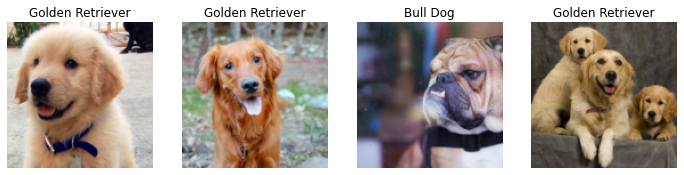

In [ ]:
dls.train.show_batch(max_n=4, nrows=1)

In [ ]:
dogs = dogs.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)
dls

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0003981071640737355)

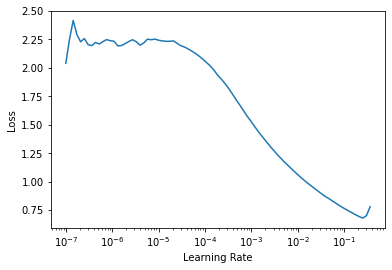

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp

In [ ]:
interp.print_classification_report()

                  precision    recall  f1-score   support

        Bull Dog       0.97      1.00      0.99        33
 German Shepherd       1.00      1.00      1.00        25
Golden Retriever       1.00      0.96      0.98        27

        accuracy                           0.99        85
       macro avg       0.99      0.99      0.99        85
    weighted avg       0.99      0.99      0.99        85



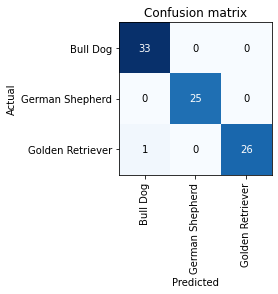

In [ ]:
interp.plot_confusion_matrix()

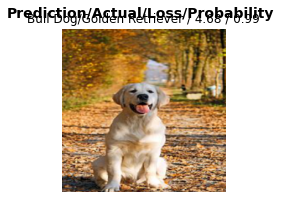

In [ ]:
interp.plot_top_losses(1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]